# Ecoulement avec saut de porosite en 1D

In [41]:
from trustutils import run

run.introduction("Yannick Gorsse")

run.TRUST_parameters()

## Introduction 
 Validation made by : Yannick Gorsse



 Report generated 27/11/2024

### TRUST parameters 
 * Version TRUST: 1.9.5_beta
 * Binary used: /Users/elie/projects/devElie/trust-code2/exec/TRUST_mpi_opt (built in directory /Users/elie/projects/devElie/trust-code2/Validation/Rapports_automatiques/Verification/Verification_codage/porosite_1D/build)

### Description: 

Ecoulement unidirectional, sans diffusion. Le domaine est 1D. On compare VDF, PolyMAC_P0P1NC, PolyMAC_P0 à la solution qui satisfait la conservation de la charge

In [42]:
from trustutils import run

run.reset()
run.initBuildDirectory()

#dis = ["VDF", "PolyMAC_P0P1NC", "PolyMAC_P0", "PolyMAC"]
dis = ["VDF", "PolyMAC_P0" ]

for d in dis:
  run.addCaseFromTemplate("jdd.data", f"{d}", {"dis" : d })
  run.addCaseFromTemplate("jdd_tanh.data", f"{d}", {"dis" : d })

run.printCases()
run.runCases()
run.tablePerf()

### Test cases 
* VDF/jdd.data 
* VDF/jdd_tanh.data 
* PolyMAC_P0/jdd.data 
* PolyMAC_P0/jdd_tanh.data 


Running ...
  => A total of 4 cases were (successfully) run in 2.7s.


,host,system,Total CPU Time,CPU time/step,number of cells
VDF/jdd,is157124.intra.cea.fr,Darwin,0.114398,0.000549786,50
VDF/jdd_tanh,is157124.intra.cea.fr,Darwin,0.316927,0.000517123,50
PolyMAC_P0/jdd,is157124.intra.cea.fr,Darwin,0.171882,0.000919849,50
PolyMAC_P0/jdd_tanh,is157124.intra.cea.fr,Darwin,0.479972,0.00110626,50
Total,,,1.083179,,


## Residuals

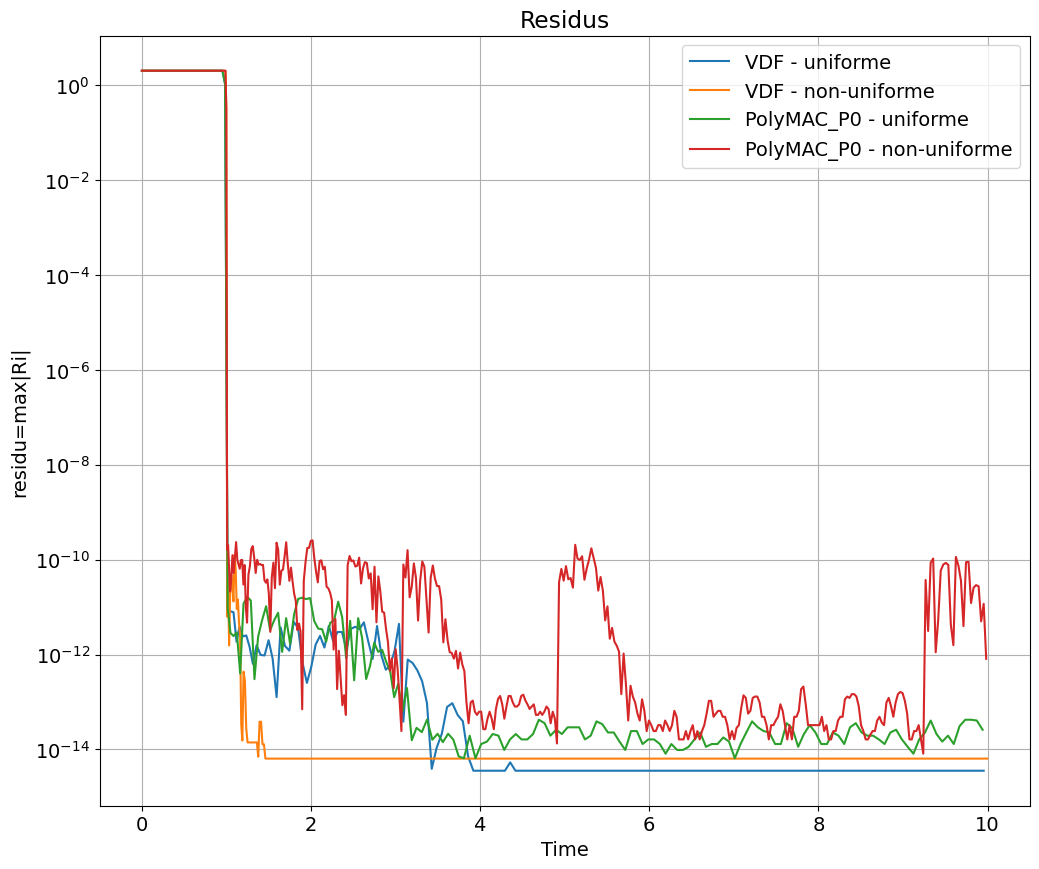

In [43]:
from trustutils import plot

a=plot.Graph("Residus")
for i in dis:
    a.addResidu(f"{run.BUILD_DIRECTORY}/{i}/jdd.dt_ev",label=f"{i} - uniforme")
    a.addResidu(f"{run.BUILD_DIRECTORY}/{i}/jdd_tanh.dt_ev",label=f"{i} - non-uniforme")

a.scale(yscale='log')


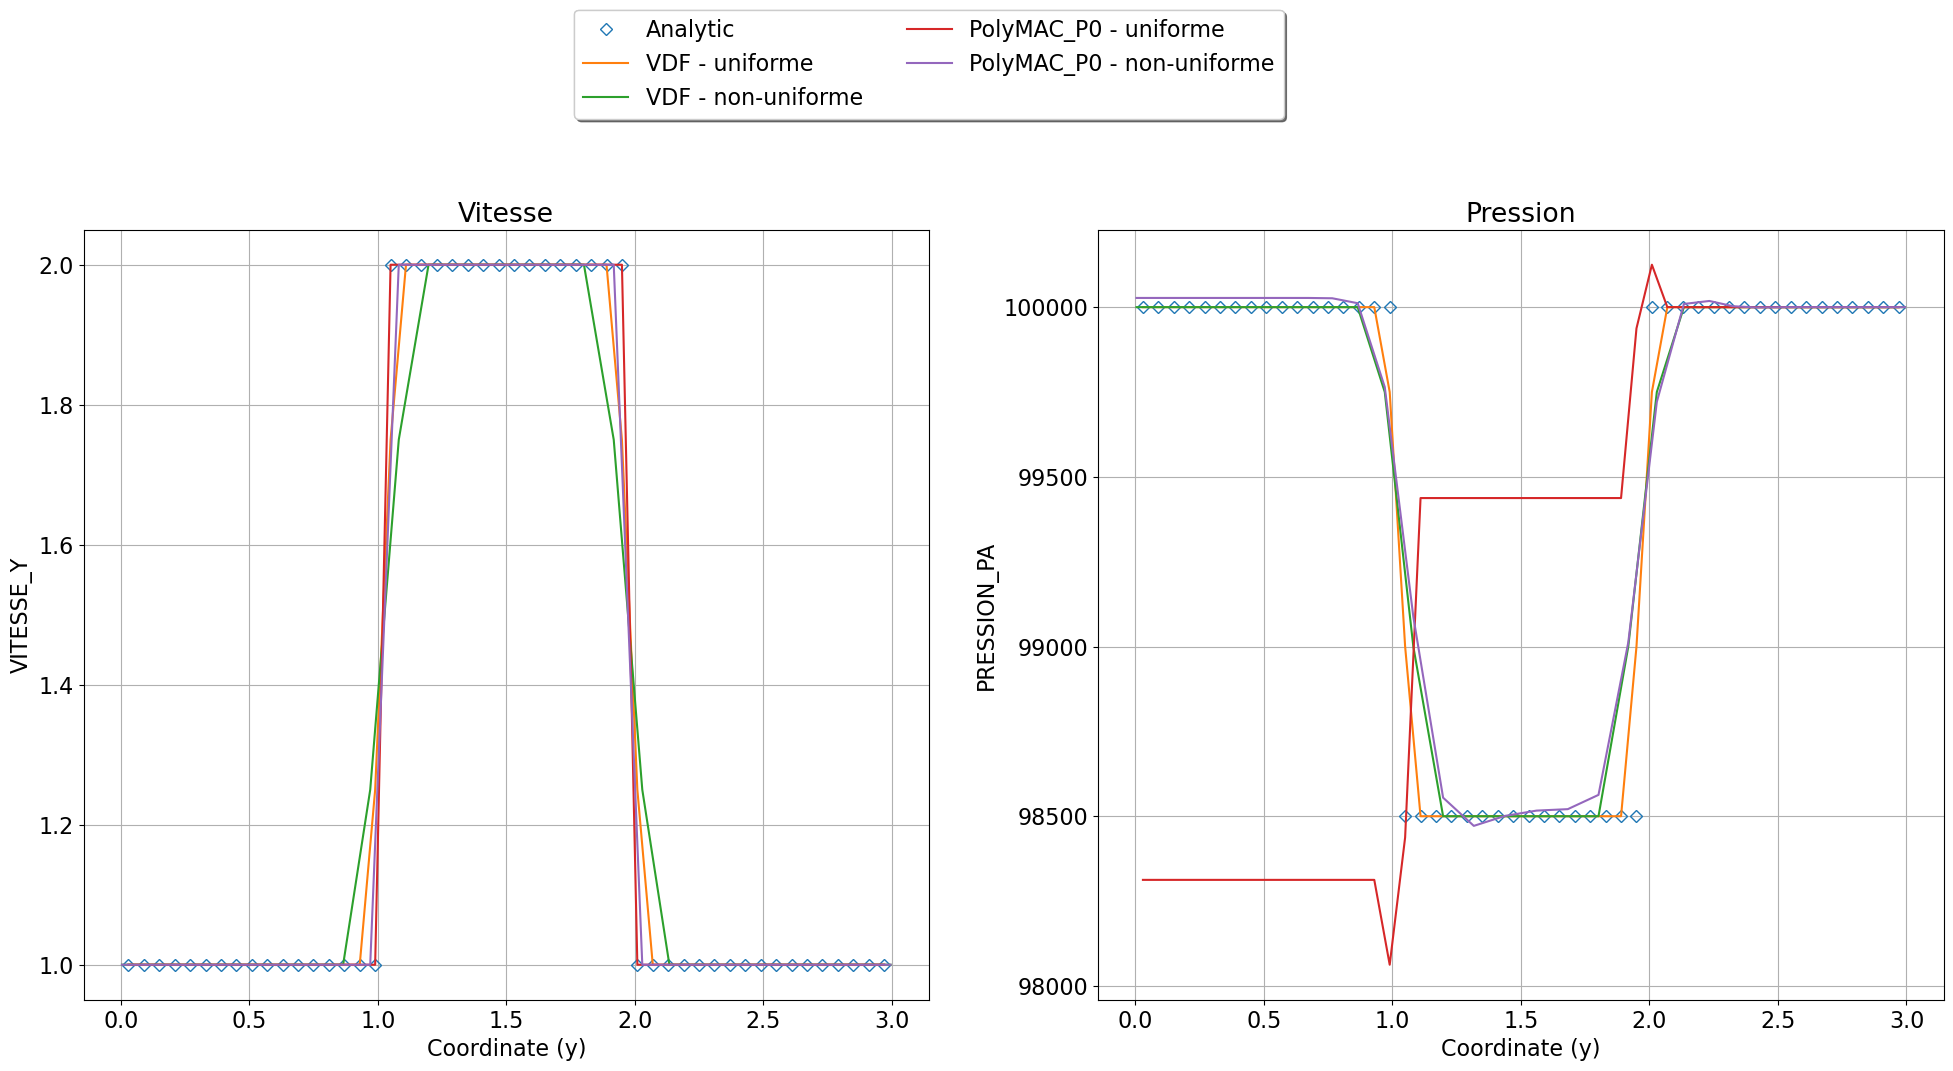

In [44]:
a=plot.Graph(label_size=16, title_size=24, legend_size=16, nY=2)

a.addPlot(0,"Vitesse")
a.addSegment("VDF/jdd_V_EX.son",label="Analytic",compo=1,marker='D',markerfacecolor='none')
for i in dis:
    a.addSegment(f"{run.BUILD_DIRECTORY}/{i}/jdd_V.son",label=f"{i} - uniforme",compo=1)
    a.addSegment(f"{run.BUILD_DIRECTORY}/{i}/jdd_tanh_V.son",label=f"{i} - non-uniforme",compo=1)
a.legend(loc='upper center', bbox_to_anchor=(1, 1.3), ncol=2, fancybox=True, shadow=True)

a.addPlot(1,"Pression")
a.addSegment("VDF/jdd_P_EX.son",label="Analytic",marker='D',markerfacecolor='none')
for i in dis:
    a.addSegment(f"{run.BUILD_DIRECTORY}/{i}/jdd_P.son",label=f"{i} - uniforme")
    a.addSegment(f"{run.BUILD_DIRECTORY}/{i}/jdd_tanh_P.son",label=f"{i} - non-uniforme")
a.legend(loc='upper center', bbox_to_anchor=(-0.2, 1.3), ncol=2, fancybox=True, shadow=True)